# RBF Network

### 1. Implementation and study of Radial Basis Function (RBF) Network - (7)
A manufacturing company has collected a large amount of data in the form of pairs of real valued input and output vectors, and wants you to build a system that will predict the outputs for new inputs. Design an appropriate Radial Basis Function (RBF) network for them. Explain what will be computed at each network layer.Describe how you would determine the weights/parameters for such a network and print the weights/ parameters?

RBF Network Method 1

In [1]:
%cd "/home/mona/3074 ML Lab/Datasets"

/home/mona/3074 ML Lab/Datasets


In [2]:
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as numpy

In [3]:
Data= pd.read_table("bank-full.csv", sep= None, engine= "python")
cols= ["age","balance","day","duration","campaign","pdays","previous"]
data_encode= Data.drop(cols, axis= 1)
data_encode= data_encode.apply(LabelEncoder().fit_transform)
data_rest= Data[cols]
Data= pd.concat([data_rest,data_encode], axis= 1)

In [4]:
data_train, data_test= train_test_split(Data, test_size= 0.33, random_state= 4)
X_train= data_train.drop("Target", axis= 1)
Y_train= data_train["Target"]
X_test= data_test.drop("Target", axis=1)
Y_test= data_test["Target"]

In [5]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [6]:
K_cent= 8
km= KMeans(n_clusters= K_cent, max_iter= 100)
km.fit(X_train)
cent= km.cluster_centers_

In [7]:
max=0 
for i in range(K_cent):
	for j in range(K_cent):
		d= numpy.linalg.norm(cent[i]-cent[j])
		if(d> max):
			max= d
d= max

sigma= d/math.sqrt(2*K_cent)

In [8]:
shape= X_train.shape
row= shape[0]
column= K_cent
G= numpy.empty((row,column), dtype= float)
for i in range(row):
    for j in range(column):
          dist= numpy.linalg.norm(X_train[i]-cent[j])
          G[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [9]:
GTG= numpy.dot(G.T,G)
GTG_inv= numpy.linalg.inv(GTG)
fac= numpy.dot(GTG_inv,G.T)
W= numpy.dot(fac,Y_train)

In [10]:
row= X_test.shape[0]
column= K_cent
G_test= numpy.empty((row,column), dtype= float)
for i in range(row):
	for j in range(column):
		dist= numpy.linalg.norm(X_test[i]-cent[j])
		G_test[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [11]:
prediction= numpy.dot(G_test,W)
prediction= 0.5*(numpy.sign(prediction-0.5)+1)

score= accuracy_score(prediction,Y_test)
print(score.mean())

0.8876675603217158


RBF Network Method 2

### 2. Comparison of performance with MLP - (3)
Compare the performance of Radial Basis Function (RBF) network with Multilayer Perceptron (MLP) network designed for the same task?
Link to data:
Use train.csv and test.csv in the following link.
https://github.com/eugeniashurko/rbfnnpy/tree/master/examples

### MPL Code:

In [55]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'seeds.csv'
dataset = load_csv(filename)
dataset = dataset[1: ]
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

TypeError: 'numpy.float64' object is not callable

In [47]:
%cd "/home/mona/3074 ML Lab/Datasets"

/home/mona/3074 ML Lab/Datasets


In [48]:
import numpy as np
import pcn              #using perceptron network
import kmeans           # and kmeans clustering algorithm

class rbf:
    """ The Radial Basis Function network
    Parameters are number of RBFs, and their width, how to train the network 
    (pseudo-inverse or kmeans) and whether the RBFs are normalised"""

    def __init__(self,inputs,targets,nRBF,sigma=0,usekmeans=0,normalise=0):
        self.nin = np.shape(inputs)[1]
        self.nout = np.shape(targets)[1]
        self.ndata = np.shape(inputs)[0]
        self.nRBF = nRBF
        self.usekmeans = usekmeans
        self.normalise = normalise
        
        if usekmeans:
            self.kmeansnet = kmeans.kmeans(self.nRBF,inputs)
            
        self.hidden = np.zeros((self.ndata,self.nRBF+1))
        
        if sigma==0:
            # Set width of Gaussians
            d = (inputs.max(axis=0)-inputs.min(axis=0)).max()
            self.sigma = d/np.sqrt(2*nRBF)  
        else:
            self.sigma = sigma
                
        self.perceptron = pcn.pcn(self.hidden[:,:-1],targets)
        
        # Initialise network
        self.weights1 = np.zeros((self.nin,self.nRBF))
        
    def rbftrain(self,inputs,targets,eta=0.25,niterations=100):
        if self.usekmeans==0:
            # Version 1: set RBFs to be datapoints
            indices = range(self.ndata)
            np.random.shuffle(indices)
            for i in range(self.nRBF):
                self.weights1[:,i] = inputs[indices[i],:]
        else:
            # Version 2: use k-means
            self.weights1 = np.transpose(self.kmeansnet.kmeanstrain(inputs))

        for i in range(self.nRBF):
            self.hidden[:,i] = np.exp(-np.sum((inputs - np.ones((1,self.nin))*self.weights1[:,i])**2,axis=1)/(2*self.sigma**2))
        if self.normalise:
            self.hidden[:,:-1] /= np.transpose(np.ones((1,np.shape(self.hidden)[0]))*self.hidden[:,:-1].sum(axis=1))
        
        # Call Perceptron without bias node (since it adds its own)
        self.perceptron.pcntrain(self.hidden[:,:-1],targets,eta,niterations)
        
    def rbffwd(self,inputs):

        hidden = np.zeros((np.shape(inputs)[0],self.nRBF+1))

        for i in range(self.nRBF):
            hidden[:,i] = np.exp(-np.sum((inputs - np.ones((1,self.nin))*self.weights1[:,i])**2,axis=1)/(2*self.sigma**2))

        if self.normalise:
            hidden[:,:-1] /= np.transpose(np.ones((1,np.shape(hidden)[0]))*hidden[:,:-1].sum(axis=1))
        
        # Add the bias
        hidden[:,-1] = -1
        outputs = self.perceptron.pcnfwd(hidden)
        return outputs
    
    def confmat(self,inputs,targets):
        """Confusion matrix"""

        outputs = self.rbffwd(inputs)
        nClasses = np.shape(targets)[1]

        if nClasses==1:
            nClasses = 2
            outputs = np.where(outputs>0,1,0)
        else:
            # 1-of-N encoding
            outputs = np.argmax(outputs,1)
            targets = np.argmax(targets,1)

        cm = np.zeros((nClasses,nClasses))
        for i in range(nClasses):
            for j in range(nClasses):
                cm[i,j] = np.sum(np.where(outputs==i,1,0)*np.where(targets==j,1,0))

        output = cm
        print("Confusion matrix is:")
        print(cm)
        print("Percentage Correct: ", np.trace(cm) / np.sum(cm) * 100)
        return output

ModuleNotFoundError: No module named 'pcn'

In [ ]:
iris = np.loadtxt('train.csv',delimiter=',')
iris[:,:-1] = iris[:,:-1]-iris[:,:-1].mean(axis=0)
imax = np.concatenate((iris.max(axis=0)*np.ones((1,5)),iris.min(axis=0)*np.ones((1,5))),axis=0).max(axis=0)
iris[:,:-1] = iris[:,:-1]/imax[:-1]
print (iris[0:5,:])

In [ ]:
iris.shape

In [ ]:
target = np.zeros((np.shape(iris)[0], 2))
indices = np.where(iris[:,-1]==0) 
target[indices,0] = 1
indices = np.where(iris[:,-1]==1)
target[indices,1] = 1
'''
indices = np.where(iris[:,9]==2)
target[indices,2] = 1
indices = np.where(iris[:,9]==3) 
target[indices,0] = 1
indices = np.where(iris[:,9]==4)
target[indices,1] = 1
indices = np.where(iris[:,9]==5)
target[indices,2] = 1
indices = np.where(iris[:,9]==5)
target[indices,2] = 1
'''

In [ ]:
order = np.arange(np.shape(iris)[0])
np.random.shuffle(order)
iris = iris[order,:]
target = target[order,:]

In [ ]:
train = iris[::2,0:4]
traint = target[::2]
valid = iris[1::4,0:4]
validt = target[1::4]
test = iris[3::4,0:4]
testt = target[3::4]

In [ ]:
print (train.max(axis=0), train.min(axis=0))

In [ ]:
net = rbf(train,traint,5,1,1)

net.rbftrain(train,traint,0.25,5000)
print("Train data:-")
net.confmat(train,traint)
print("Test data:-")
cm = net.confmat(test,testt)

In [ ]:
cm

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = np.array(cm)
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14})  # font size
plt.show()

In [ ]:
from sklearn.metrics import classification_report
targets=testt
inputs = test
nClasses = np.shape(targets)[1]
outputs = net.rbffwd(inputs)
if nClasses==1:
    nClasses = 2
    outputs = np.where(outputs>0,1,0)
else:
    # 1-of-N encoding
    outputs = np.argmax(outputs,1)
    targets = np.argmax(targets,1)


print(classification_report(targets, outputs))

# ------

In [30]:
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as numpy

In [35]:
Data= pd.read_table("train.csv", sep= None, engine= "python")
#cols= ["age","balance","day","duration","campaign","pdays","previous"]
#data_encode= Data.drop(cols, axis= 1)
data_encode= Data.apply(LabelEncoder().fit_transform)
#data_rest= Data[cols]
#Data= pd.concat([data_rest,data_encode], axis= 1)

In [39]:
data_train, data_test= train_test_split(Data.iloc[:1000], test_size= 0.33, random_state= 4)
X_train= data_train.drop(columns=data_train.columns[-1], axis= 1)
Y_train= data_train.iloc[:, :-1]
X_test= data_test.drop(columns=data_test.columns[-1], axis=1)
Y_test= data_test.iloc[:, :-1]

In [40]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [41]:
K_cent= 8
km= KMeans(n_clusters= K_cent, max_iter= 100)
km.fit(X_train)
cent= km.cluster_centers_

In [42]:
max=0 
for i in range(K_cent):
	for j in range(K_cent):
		d= numpy.linalg.norm(cent[i]-cent[j])
		if(d> max):
			max= d
d= max

sigma= d/math.sqrt(2*K_cent)

In [43]:
shape= X_train.shape
row= shape[0]
column= K_cent
G= numpy.empty((row,column), dtype= float)
for i in range(row):
    for j in range(column):
          dist= numpy.linalg.norm(X_train[i]-cent[j])
          G[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [44]:
GTG= numpy.dot(G.T,G)
GTG_inv= numpy.linalg.inv(GTG)
fac= numpy.dot(GTG_inv,G.T)
W= numpy.dot(fac,Y_train)

In [45]:
row= X_test.shape[0]
column= K_cent
G_test= numpy.empty((row,column), dtype= float)
for i in range(row):
	for j in range(column):
		dist= numpy.linalg.norm(X_test[i]-cent[j])
		G_test[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [46]:
prediction= numpy.dot(G_test,W)
prediction= 0.5*(numpy.sign(prediction-0.5)+1)

score= accuracy_score(prediction,Y_test)
print(score.mean())

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

# *||||||

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
                #commented this print('Loss: {0:.2f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise

rbfnet = RBFNet(lr=1e-2, k=2, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()

plt.tight_layout()
plt.show()

### 3. Implementation of XOR gate? (5)
Demonstrate the capability of an RBF network to model XOR logic gate. Generate the performance curves for these RBF models as the inputs vay continuously from 0.0 to 1.0?

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def gaussian_rbf(x, landmark, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x - landmark)**2)

In [60]:
def end_to_end(X1, X2, ys, mu1, mu2):
    from_1 = [gaussian_rbf(i, mu1) for i in zip(X1, X2)]
    from_2 = [gaussian_rbf(i, mu2) for i in zip(X1, X2)]
    # plot
    
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.scatter((x1[0], x1[3]), (x2[0], x2[3]), label="Class_0")
    plt.scatter((x1[1], x1[2]), (x2[1], x2[2]), label="Class_1")
    plt.xlabel("$X1$", fontsize=15)
    plt.ylabel("$X2$", fontsize=15)
    plt.title("Xor: Linearly Inseparable", fontsize=15)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(from_1[0], from_2[0], label="Class_0")
    plt.scatter(from_1[1], from_2[1], label="Class_1")
    plt.scatter(from_1[2], from_2[2], label="Class_1")
    plt.scatter(from_1[3], from_2[3], label="Class_0")
    plt.plot([0, 0.95], [0.95, 0], "k--")
    plt.annotate("Seperating hyperplane", xy=(0.4, 0.55), xytext=(0.55, 0.66),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.xlabel(f"$mu1$: {(mu1)}", fontsize=15)
    plt.ylabel(f"$mu2$: {(mu2)}", fontsize=15)
    plt.title("Transformed Inputs: Linearly Seperable", fontsize=15)
    plt.legend()

    # solving problem using matrices form
    # AW = Y
    A = []

    for i, j in zip(from_1, from_2):
        temp = []
        temp.append(i)
        temp.append(j)
        temp.append(1)
        A.append(temp)
    
    A = np.array(A)
    W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)
    print(np.round(A.dot(W)))
    print(ys)
    print(f"Weights: {W}")
    return W

In [61]:
def predict_matrix(point, weights):
    gaussian_rbf_0 = gaussian_rbf(np.array(point), mu1)
    gaussian_rbf_1 = gaussian_rbf(np.array(point), mu2)
    A = np.array([gaussian_rbf_0, gaussian_rbf_1, 1])
    return np.round(A.dot(weights))

[-0.  1.  1. -0.]
[0 1 1 0]
Weights: [ 2.5026503   2.5026503  -1.84134719]
Input:[0 0], Predicted: -0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: -0.0


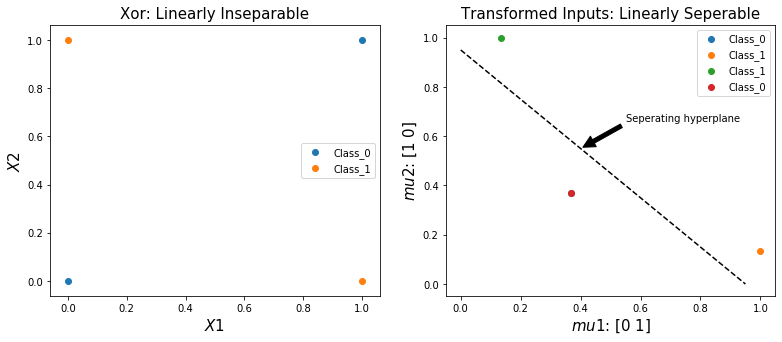

In [62]:
# points
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0])

# centers
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])

w = end_to_end(x1, x2, ys, mu1, mu2)

# testing

print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")

[0. 1. 1. 0.]
[0 1 1 0]
Weights: [-2.5026503  -2.5026503   2.84134719]
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


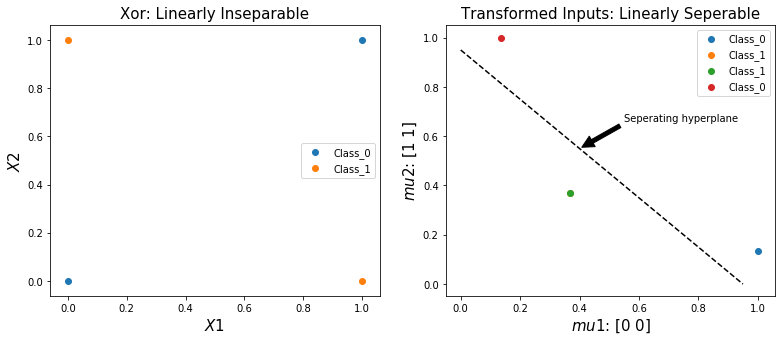

In [63]:
# centers
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])

w = end_to_end(x1, x2, ys, mu1, mu2)

# testing

print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")

### Spot
Implement a handwritten character recognition algorithm using RBF neural networks?.Use your own dataset.

In [57]:
import numpy as np


def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    # centroids = [np.random.uniform(size=len(X[0])) for i in range(k)]

    converged = False
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]


class RBF:

    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def get_rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def get_rbf_as_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.get_rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def fit(self):

        self.centroids, self.std_list = kmeans(self.X, self.k, 1000)

        if not self.std_from_clusters:
            dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

        RBF_X = self.get_rbf_as_list(self.X, self.centroids, self.std_list)

        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

        RBF_list_tst = self.get_rbf_as_list(self.tX, self.centroids, self.std_list)

        self.pred_ty = RBF_list_tst @ self.w

        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

        diff = self.pred_ty - self.ty

        print('Accuracy: ', len(np.where(diff == 0)[0]) / len(diff))


##################################

data = np.load('mnist_data.npy',).astype(float)

train_y = data[0:500, 0]
train_x = data[0:500, 1:]

test_y = data[0:100, 0]
test_x = data[0:100, 1:]

RBF_CLASSIFIER = RBF(train_x, train_y, test_x, test_y, num_of_classes=10,
                     k=10, std_from_clusters=False)

RBF_CLASSIFIER.fit()

OSError: Failed to interpret file 'mnist_data.npy' as a pickle

In [ ]:
import numpy as np


def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
  
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    converged = False
    
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]